# SESSION-2
## How to create your first deep learning neural network model in Python using Keras?
(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)
## PROBLEM Category: Classification (BINARY)
## DataType: Structured (.csv format)


# For today's session, we are going to use the **Pima Indians**  diabetes dataset comprising 9 parameters. This is a standard machine learning dataset from the UCI Machine Learning repository.This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.The data contains patient medical record of Pima Indians and classify if they have onset of diabetes within five years or not.

# Dataset Description
## -------------------------------------------------------------------------------------------------
### Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

### Output Variables (y):
9. Class variable (0 or 1)
## ---------------------------------------------------------------------------------------------------

# IMPORT LIBRARIES

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



**You can set different styles of visualization using Seaborn library, darkgrid is set here, you can try and find other options too!**

In [ ]:
sns.set_style("darkgrid")

# LOAD THE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/pima-indians-diabetes.csv', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/pima-indians-diabetes.csv'

In [ ]:
dataset

,NoOfPreg,GlucoseTolerance,BP,TricepSkinThick,SerumInsulin,BMI,DiabetesPedigree,Age,DiabetesProbability
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# INVESTIGATE/EXAMINE DATASET

In [ ]:
# print the shape of the data i.e. no. of records and no of columns
dataset.shape

(768, 9)

In [ ]:
# lets print some basic information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NoOfPreg             768 non-null    int64  
 1   GlucoseTolerance     768 non-null    int64  
 2    BP                  768 non-null    int64  
 3   TricepSkinThick      768 non-null    int64  
 4   SerumInsulin         768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   DiabetesPedigree     768 non-null    float64
 7   Age                  768 non-null    int64  
 8   DiabetesProbability  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='DiabetesProbability', ylabel='count'>

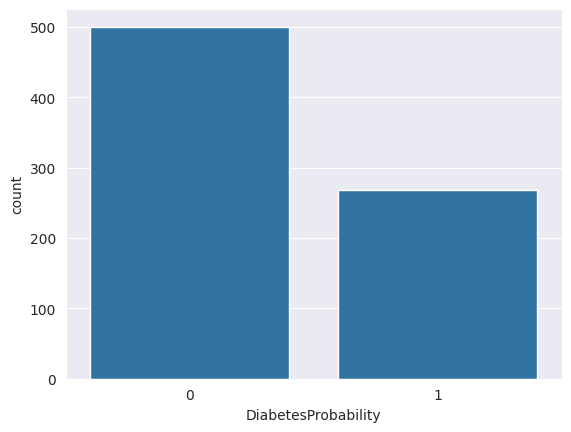

In [ ]:
#Visualize the count of patients with having diabetes
sns.countplot(x ='DiabetesProbability', data = dataset)

## a) Plot heatmap
"Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables"
Reference: https://chartio.com/learn/charts/heatmap-complete-guide/#:~:text=Heatmaps%20are%20used%20to%20show,for%20one%20or%20both%20variables.

<Axes: >

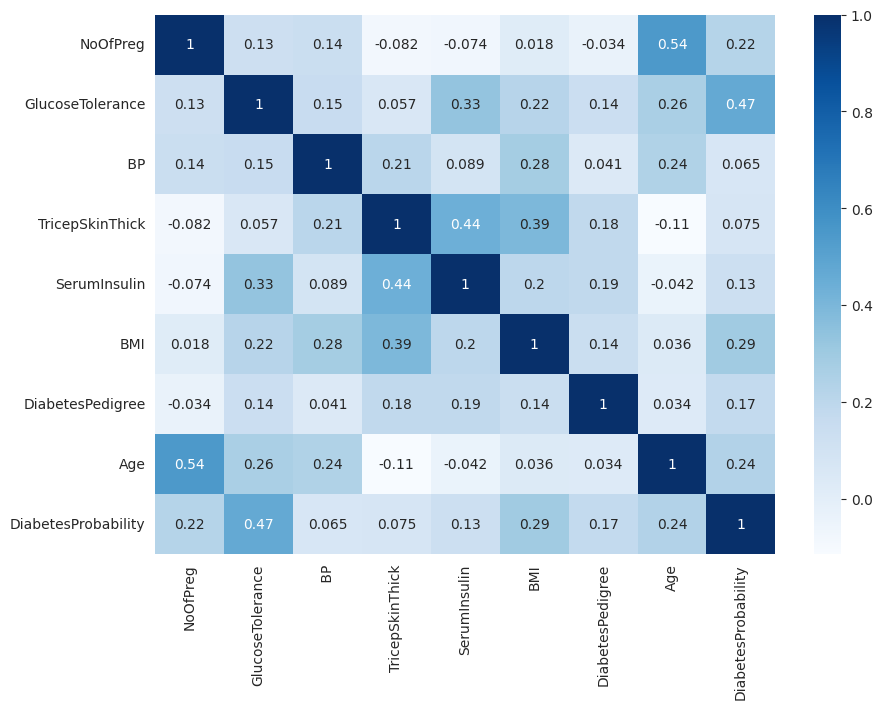

In [ ]:
plt.rcParams['figure.figsize']= (10,7)
cor=dataset.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap="Blues")

## b) describe the data (descriptive stats)

In [ ]:
dataset.describe()

,NoOfPreg,GlucoseTolerance,BP,TricepSkinThick,SerumInsulin,BMI,DiabetesPedigree,Age,DiabetesProbability
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# INDICATE: WHAT IS x AND y?

The variable whose value is to be predicted is named as Y, and all the other variables, which will be used to derive Y's values are grouped as X

In [ ]:
# split into input (X) and output (y) variables
X=dataset[['NoOfPreg', 'GlucoseTolerance', ' BP', 'TricepSkinThick',
       'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]
Y=dataset['DiabetesProbability']

# Split the dataset (keep some records for later testing)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

# stratify=Y as an argument to the above function and see if model.fit results improve.


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(614, 8)
(614,)
(154,)
(154, 8)


# BUILD THE NN USING KERAS

a simple rule: The number of hidden neurons should be less than twice the size of the input layer.

## 1. Define Strcuture of the Model

So we have 8 no of inputs, and 1 output (which could either be 0 or 1)
![model.jpg](attachment:model.jpg)


### Using Sequential Approach

In [ ]:

# define the keras model
model = Sequential()
# we set 64 no of neurons in the first layer, you can play with this value. but input_dim should not be changed as it is the number of inputs
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

## 2. Compile the Model

Compiling the model requires the loss function and an optimizer with Metrics value

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer= 'adagrad', metrics=['accuracy'])


## 3. Fit the model

In [ ]:
# fit the keras model on the dataset
history=model.fit(x_train, y_train, validation_split=0.11, epochs=400, batch_size=32)

Epoch 1/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8105 - loss: 0.3960 - val_accuracy: 0.8088 - val_loss: 0.4521
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8376 - loss: 0.3719 - val_accuracy: 0.7941 - val_loss: 0.4420
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8275 - loss: 0.3741 - val_accuracy: 0.7941 - val_loss: 0.4422
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8307 - loss: 0.3679 - val_accuracy: 0.8235 - val_loss: 0.4377
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.3391 - val_accuracy: 0.8088 - val_loss: 0.4388
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8336 - loss: 0.3610 - val_accuracy: 0.7941 - val_loss: 0.4414
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8491 - loss: 0.3464 - val_accuracy: 0.7941 - val_loss: 0.4405
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8295 - loss: 0.3776 - val_accuracy: 0.8088 - 

## 4. Visualize the learning of the Model

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


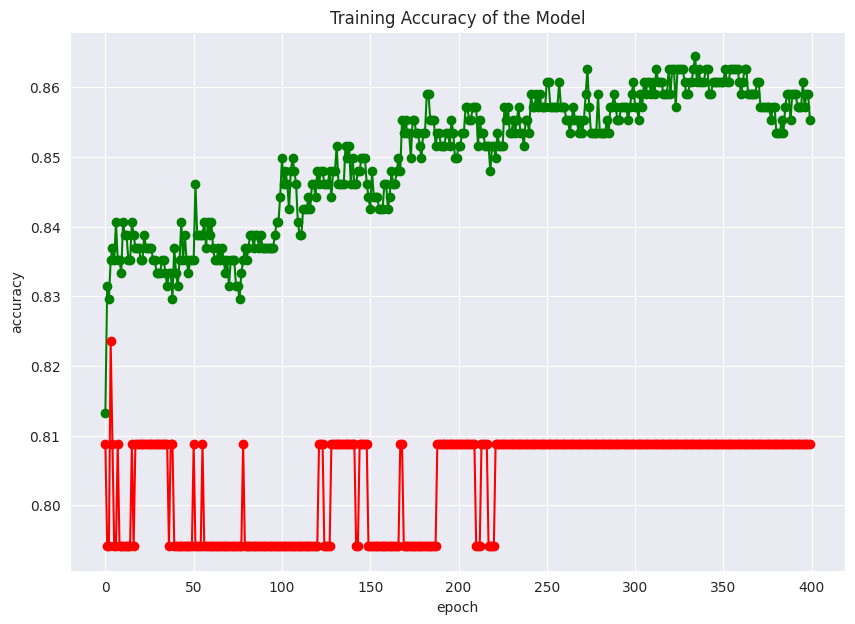

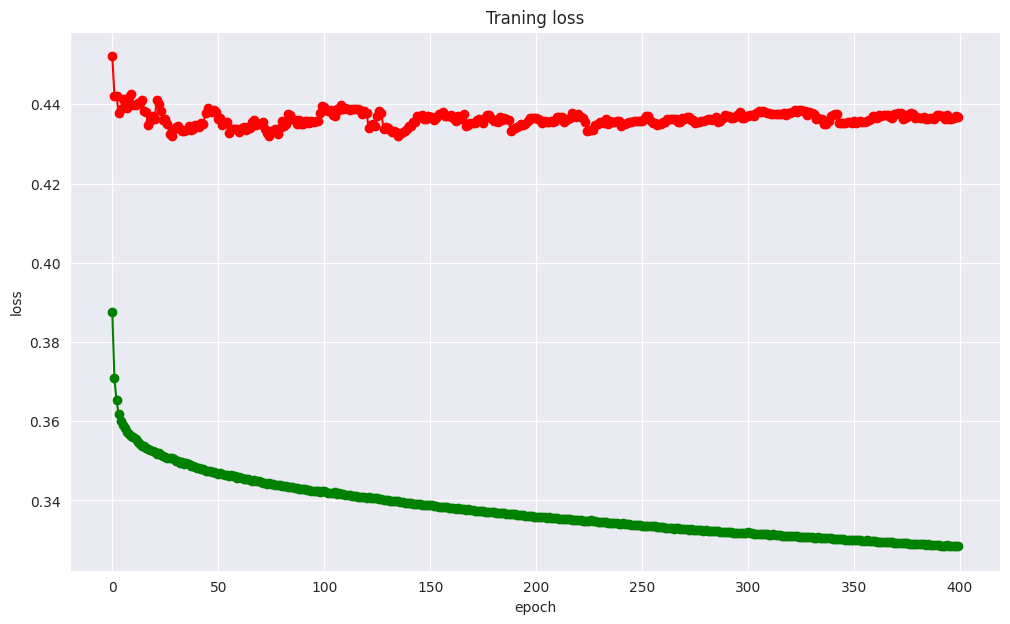

In [ ]:
#plt.figure(figsize=(12,7))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'],color='green', marker='o')
plt.plot(history.history['val_accuracy'],color='red', marker='o')
plt.title('Training Accuracy of the Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], color='green', marker='o')
plt.plot(history.history['val_loss'], color='red', marker='o')
plt.title('Traning loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 5. Make Predictions

In [ ]:
# make class predictions with the model
predictions=(model.predict(x_test) > 0.5).astype(int)
accuracy_score(y_test, predictions)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


0.7077922077922078

In [ ]:
y_test= pd.DataFrame(y_test)
y_pred= pd.DataFrame(predictions)
y_test.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)
df = pd.concat([y_test, y_pred], axis=1)
df

,DiabetesProbability,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
149,0,0
150,0,0
151,0,1
152,1,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


NameError: name 'x' is not defined

## **TASKS FOR STUDENTS**

*You might have observed that the accuracy of the model is not good i.e. !>80% and likewise the loss is not very low*

# **To optimize the model, do following things One by One and observe the performance**


## 1) Add stratify=Y in train/test split function as an argument
## 2) Add some complexity to the model (e.g. add one or 2 more dense hidden layers, or increase number of neurons in the hidden layers)
## 3) Try testing different optimizers (e.g. SGD, Adam, Adagrad etc.)
## 4) Increase number of epochs
## 5) Change Batch size

In [ ]:
# prompt: 1) Add stratify=Y in train/test split function as an argument
# 2) Add some complexity to the model (e.g. add one or 2 more dense hidden layers, or increase number of neurons in the hidden layers)
# 3) Try testing different optimizers (e.g. SGD, Adam, Adagrad etc.)
# 4) Increase number of epochs
# 5) Change Batch size

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=8, activation='relu'))  # Increased neurons
model.add(Dense(128, activation='relu'))  # Added another hidden layer
model.add(Dense(64, activation='relu'))    # Added another hidden layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed optimizer

# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_split=0.11, epochs=600, batch_size=64) # Increased epochs and batch size


NameError: name 'X' is not defined

# **Optional Challenge**

# You can scale your data as a preprocessing step.
## Lets Scale our data to see if it helps?
## After scaling the data, train the model again to see if it brings any difference!


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_dataTrain=scaler.fit_transform(x_train)
scaled_dataTest=scaler.fit_transform(x_test)
scaled_dataTest

NameError: name 'x_train' is not defined